# Courbe d’intensité

Exemple simple : Courbes d’intensités lumineuse au limbe à partir d'images d’un coronographe

In [2]:
import matplotlib.pyplot as plt
import math

import numpy as np

In [3]:
import glob
from module import readFitsBz2
from IPython.display import clear_output

path = 'data/C2/'

hdul = []
counter = 0

files = glob.glob(path + '*_c2_*.fts.bz2')
total = len(files)
for file in files:
    hdul.append(readFitsBz2(file))
    counter+=1
    clear_output(wait=True)
    print(f'{counter}/{total}')

187/187


In [95]:
r = 830
stepSize = math.pi/360.0

circle = []
t0 = math.pi/2.0
t = t0
while t < 2 * math.pi+t0:
    circle.append((round(r * math.cos(t) + hdul[0].data.shape[0]/2), round(r * math.sin(t) + hdul[0].data.shape[0]/2)))
    t += stepSize

In [96]:
coord_x = [x for x,y in circle]
coord_y = [y for x,y in circle]

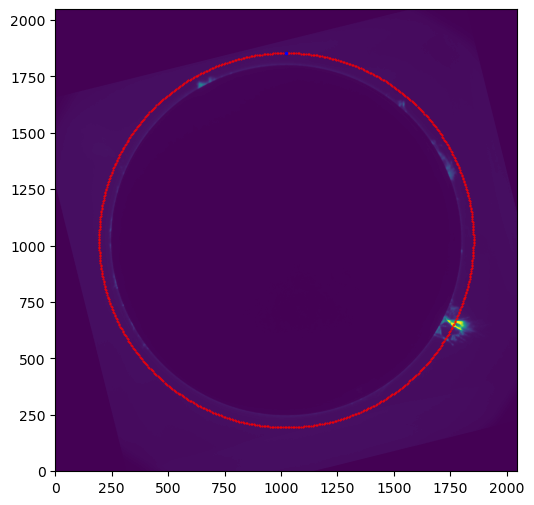

In [101]:
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(hdul[175].data, origin='lower')
plt.scatter(coord_x, coord_y, marker='.', s=1, c='r');

plt.scatter(coord_x[0], coord_y[0], marker='.', s=10, c='b');

In [102]:
from datetime import datetime, timedelta

start_time = datetime.strptime(hdul[0].header['DATE_OBS'], "%Y-%m-%dT%H:%M:%S.%f")
end_time = datetime.strptime(hdul[-1].header['DATE_OBS'], "%Y-%m-%dT%H:%M:%S.%f")

if start_time.second>30:
    start_time = start_time + timedelta(minutes=1)

start_time.replace(second=0)

time_difference = end_time - start_time
end_idx = round(time_difference.total_seconds()/60)

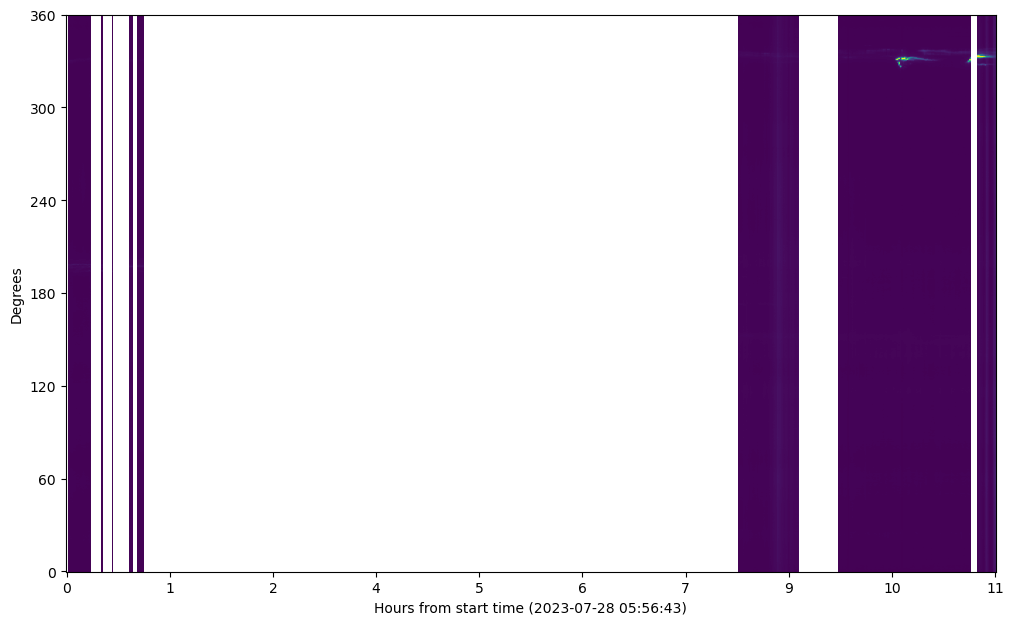

In [115]:
intensities = np.full((720,end_idx+1),np.nan)
for hdu in hdul:    
    time = datetime.strptime(hdu.header['DATE_OBS'], "%Y-%m-%dT%H:%M:%S.%f")
    
    time_difference = time - start_time
    
    idx = round(time_difference.total_seconds()/60)

    intensity = []
    for coord in circle:
        intensity.insert(0,hdu.data[coord])
        
    intensities[:,idx] = intensity

fig, ax = plt.subplots(figsize=(12,12))

aspect_ratio = intensities.shape[0] / intensities.shape[1]

plt.imshow(intensities, aspect=aspect_ratio * 0.5, origin='lower');

ticks = np.linspace(0, end_idx/60.0, end_idx//60)
ax.set_xticks(np.linspace(0, end_idx, end_idx//60))
ax.set_xticklabels([f'{tick:.0f}' for tick in ticks])
plt.xlabel(f'Hours from start time ({start_time})')

ticks = np.linspace(0, 360, 7)
ax.set_yticks(np.linspace(0, 720, 7))
ax.set_yticklabels([f'{tick:.0f}' for tick in ticks])
plt.ylabel('Degrees')

plt.show()

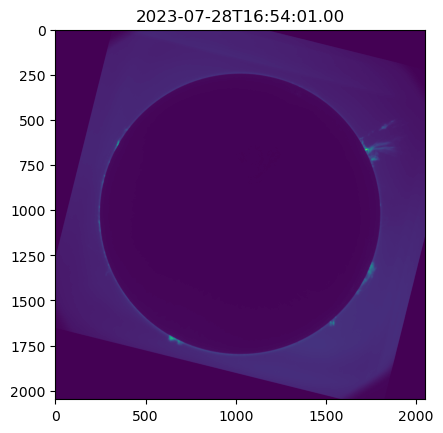

In [110]:
plt.imshow(hdul[-1].data)
plt.title(hdul[-1].header['DATE_OBS']);